In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
os.chdir('/home/alexander/Рабочий стол/python/house_prices/')
df_train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample_submission=pd.read_csv('sample_submission.csv')

In [8]:
# Показать тип данных, 3 примера, долю NA, по числовым: число строк, среднее, ст.откл.,мин, макс, квартили

def summary(data):
    pd.options.display.max_rows=data.shape[1]
    shape=data.shape
    a=pd.DataFrame(data.dtypes)
    b=np.transpose(data[0:3])
    c=df_train.isnull().sum(axis = 0)/len(data)
    d=np.transpose(data.describe())
    result=pd.concat([a,b,c,d],axis=1)
    result.columns=['type','row1','row2','row3','na_pct','count','mean','std','min','1q','2q','3q','max']
    return result

In [24]:
summary(df_train)

,type,row1,row2,row3,na_pct,count,mean,std,min,1q,2q,3q,max
1stFlrSF,int64,856,1262,920,0.000000,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,int64,854,0,866,0.000000,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0
3SsnPorch,int64,0,0,0,0.000000,1460.0,3.409589,29.317331,0.0,0.00,0.0,0.00,508.0
Alley,object,NaN,NaN,NaN,0.937671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BedroomAbvGr,int64,3,3,3,0.000000,1460.0,2.866438,0.815778,0.0,2.00,3.0,3.00,8.0
BldgType,object,1Fam,1Fam,1Fam,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtCond,object,TA,TA,TA,0.025342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtExposure,object,No,Gd,Mn,0.026027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,int64,706,978,486,0.000000,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,int64,0,0,0,0.000000,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [9]:
# Данная функция выдает информацию по категориальным переменным: число уникальных значений,
# вариативность переменной, NA процент, топ-2 категории и их численность в %

def cat_summary(data,klargest=2,colnames=['unique','unique_div_by_len','na_pct','cat1','cat2','cat1cnt','cat2cnt']):
    cat_data=data.select_dtypes(include=['object'])
    pd.options.display.max_rows=data.shape[1]
    a=cat_data.apply(lambda x: len(x.unique()))
    b=a/len(cat_data)
    c=cat_data.isnull().sum(axis = 0)/len(cat_data)
    d=np.transpose(cat_data.apply(lambda x: x.value_counts().nlargest(n=klargest).index))
    e=np.transpose(cat_data.apply(lambda x: x.value_counts().nlargest(n=klargest).values/len(cat_data)))
    result=pd.concat([a,b,c,d,e],axis=1)
    result.columns=colnames
    return result

In [23]:
cat_summary(df_train)

,unique,unique_div_by_len,na_pct,cat1,cat2,cat1cnt,cat2cnt
MSZoning,5,0.003425,0.000000,RL,RM,0.788356,0.149315
Street,2,0.001370,0.000000,Pave,Grvl,0.995890,0.004110
Alley,3,0.002055,0.937671,Grvl,Pave,0.034247,0.028082
LotShape,4,0.002740,0.000000,Reg,IR1,0.633562,0.331507
LandContour,4,0.002740,0.000000,Lvl,Bnk,0.897945,0.043151
Utilities,2,0.001370,0.000000,AllPub,NoSeWa,0.999315,0.000685
LotConfig,5,0.003425,0.000000,Inside,Corner,0.720548,0.180137
LandSlope,3,0.002055,0.000000,Gtl,Mod,0.946575,0.044521
Neighborhood,25,0.017123,0.000000,NAmes,CollgCr,0.154110,0.102740
Condition1,9,0.006164,0.000000,Norm,Feedr,0.863014,0.055479


In [11]:
# Функция рисует гистограммы по всем количественным переменным

def all_num_hist(data):
    num_data=data.select_dtypes(include=['float32','float64','int32','int64'])
    num_data = num_data.melt(var_name='columns')
    g = sns.FacetGrid(num_data, col='columns',col_wrap=3,sharex=False, sharey=False)
    g = (g.map(sns.distplot, 'value'))

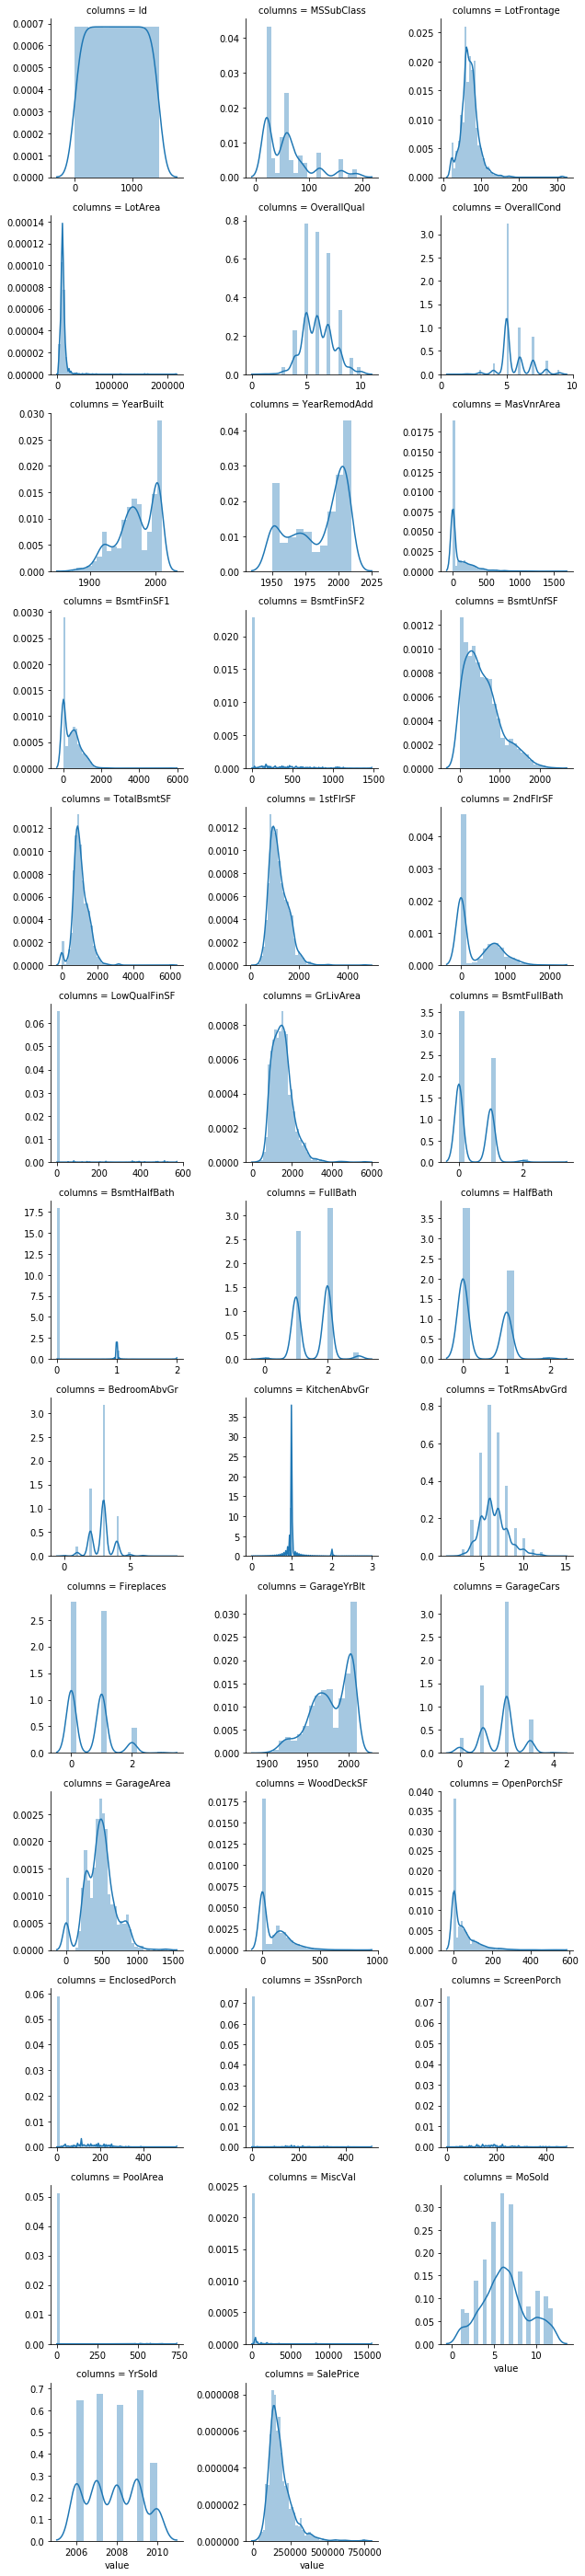

In [12]:
all_num_hist(df_train)

In [13]:
# Рисуем гистограммы категориальных переменных

def all_cat_hist(data):
    cat_data=data.select_dtypes(include=['object'])
    for col in cat_data:
        cat_data[col].value_counts().plot(kind='bar',label='d')
        plt.title(col)
        plt.show()

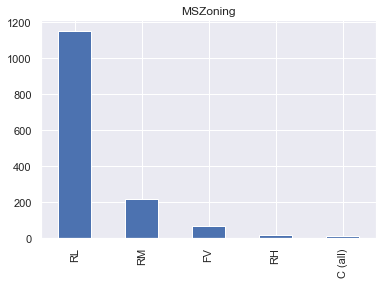

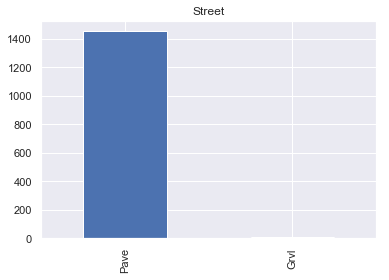

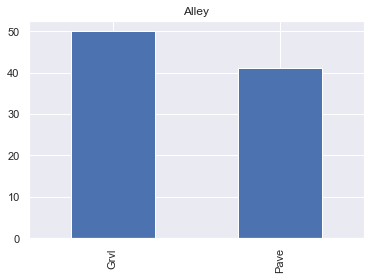

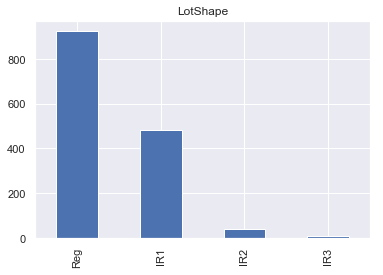

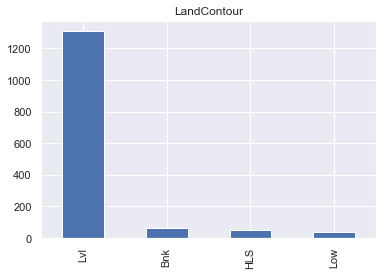

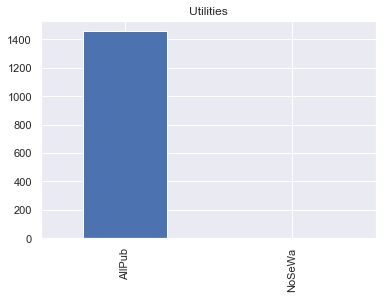

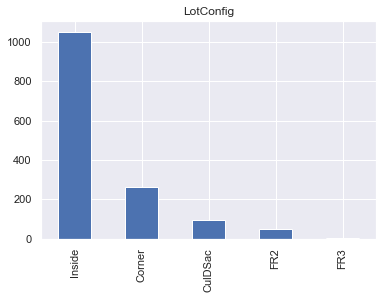

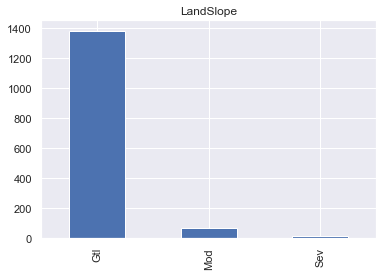

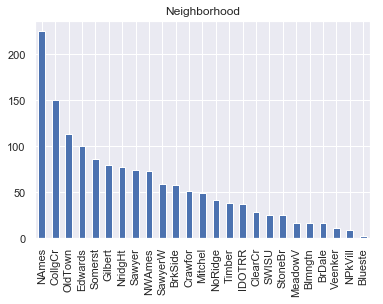

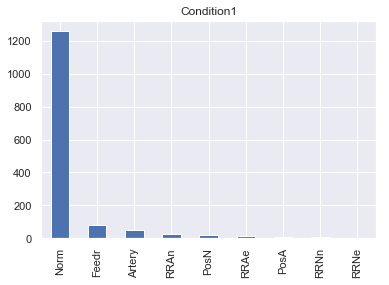

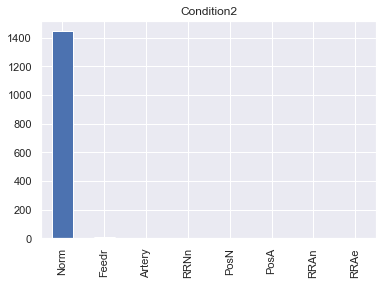

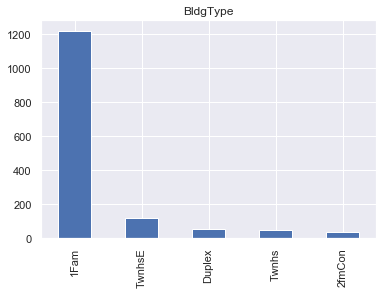

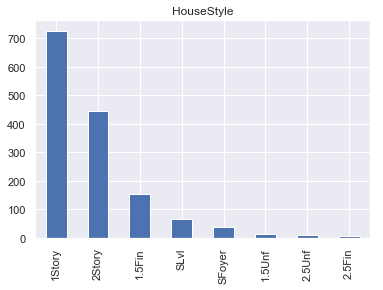

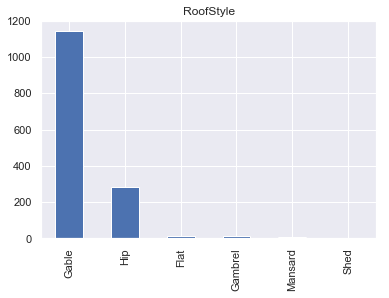

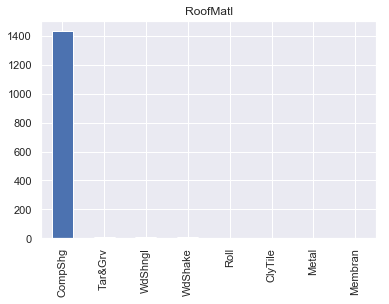

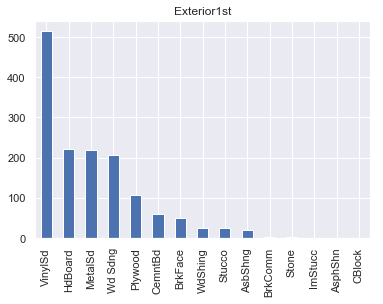

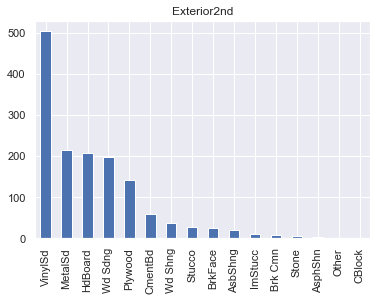

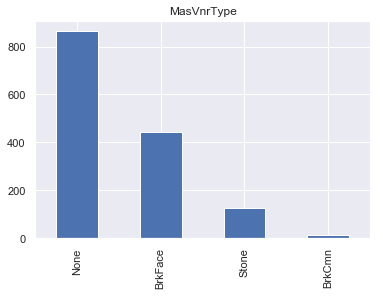

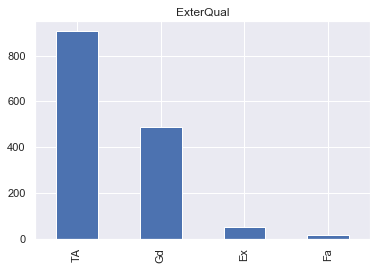

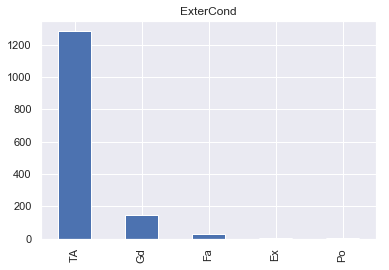

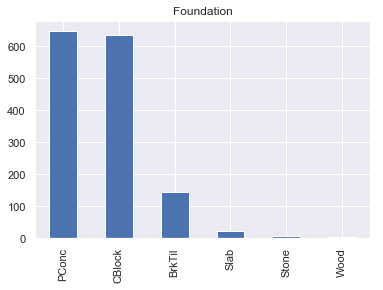

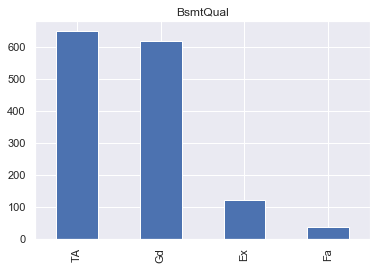

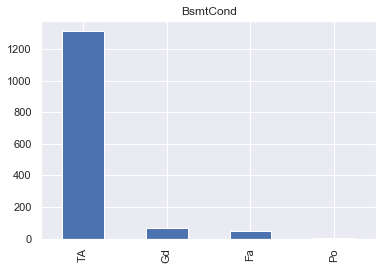

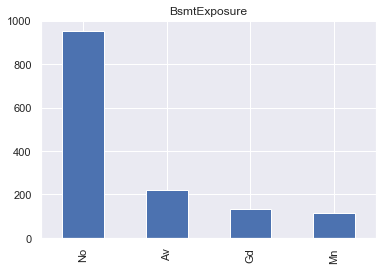

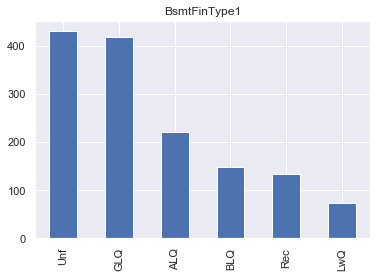

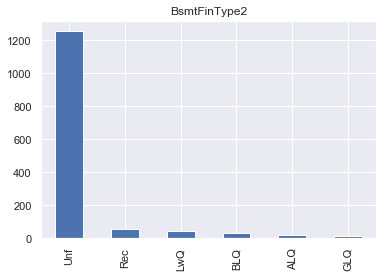

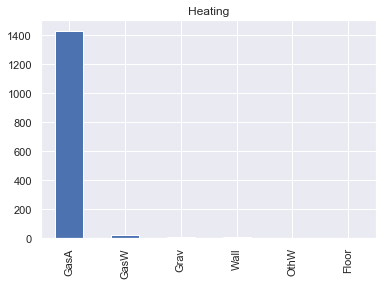

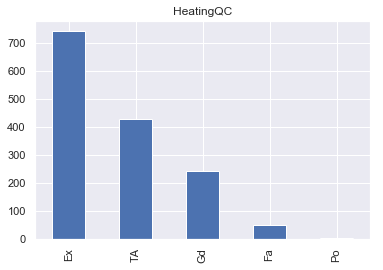

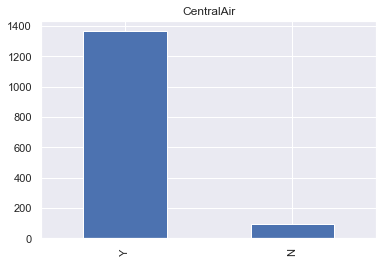

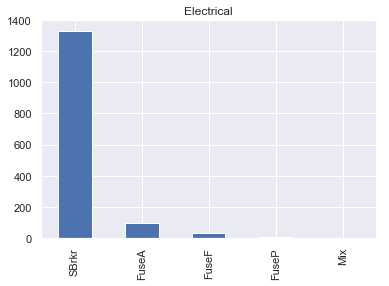

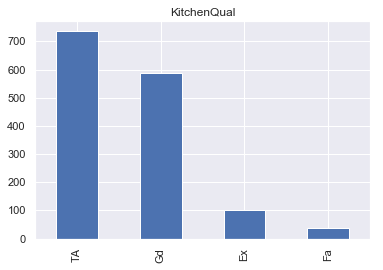

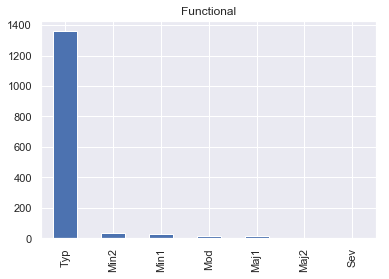

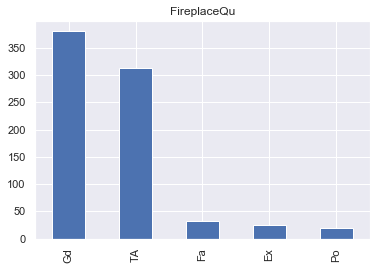

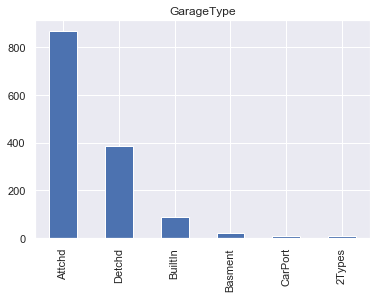

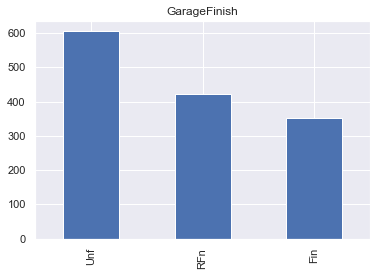

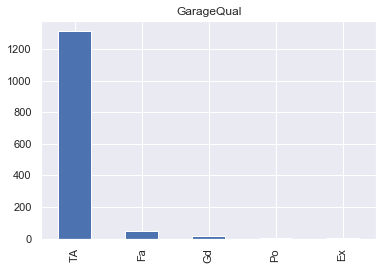

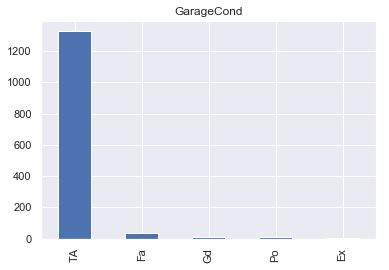

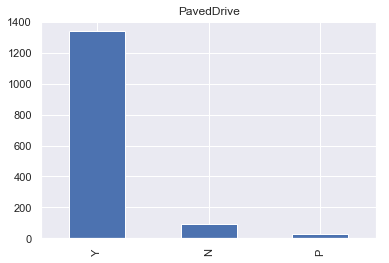

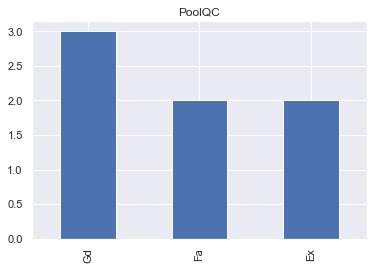

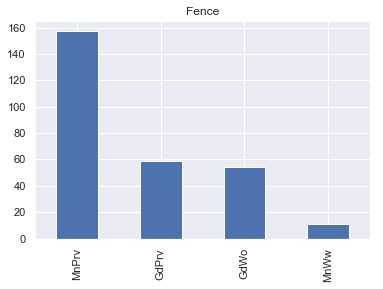

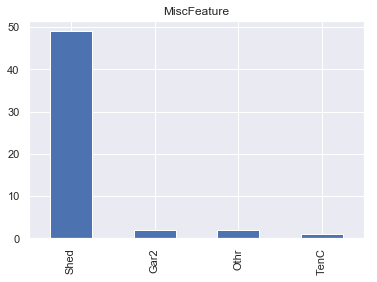

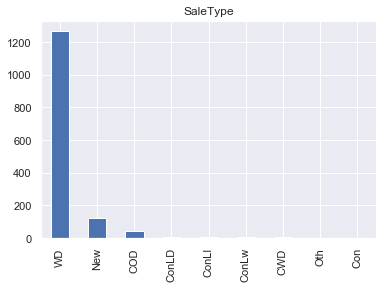

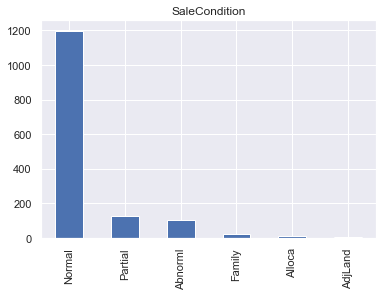

In [22]:
all_cat_hist(df_train)

In [15]:
# correlation matrix
def plot_corr_matrix(data):
    corrmat = data.corr()
    f, ax = plt.subplots(figsize=(20, 10))
    sns.heatmap(corrmat, vmax=1, square=True);

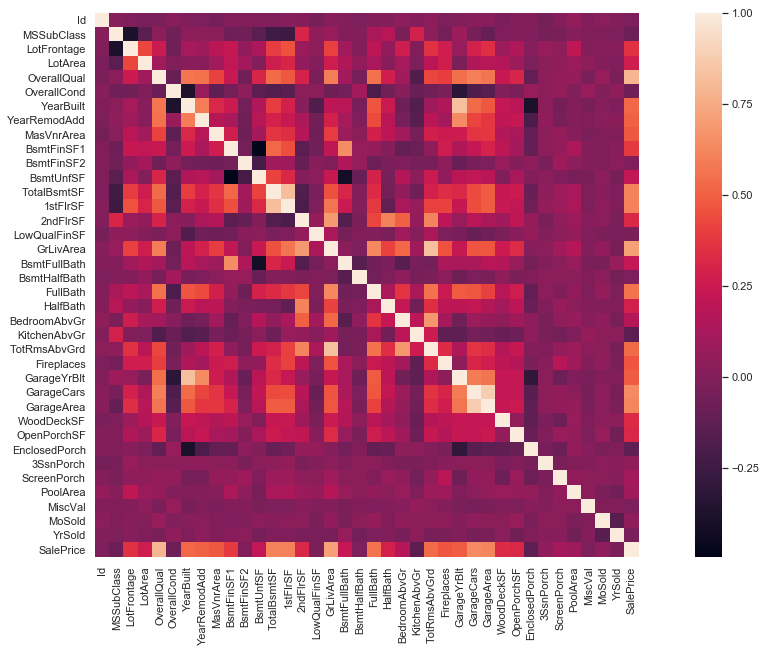

In [21]:
plot_corr_matrix(df_train)

In [57]:
# target correlation matrix

def corr_with_target(data,target,k):
    cols = corrmat.nlargest(k, target)[target].index
    cm = np.corrcoef(data[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()

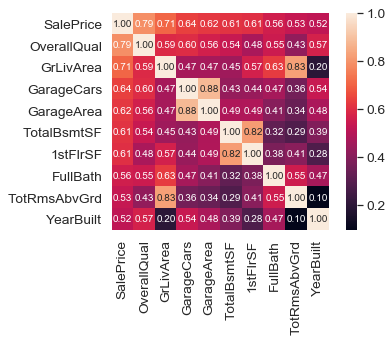

In [58]:
# corr_with_target(df_train,'SalePrice',10)

In [17]:
# Показать совместные графики целевой и топ-k переменных
def joint_plots(data,target,k):
    corrmat = data.corr()
    cols = corrmat.nlargest(k, target)[target].index
    sns.set()
    sns.pairplot(df_train[cols], size = 2.5)
    plt.show();

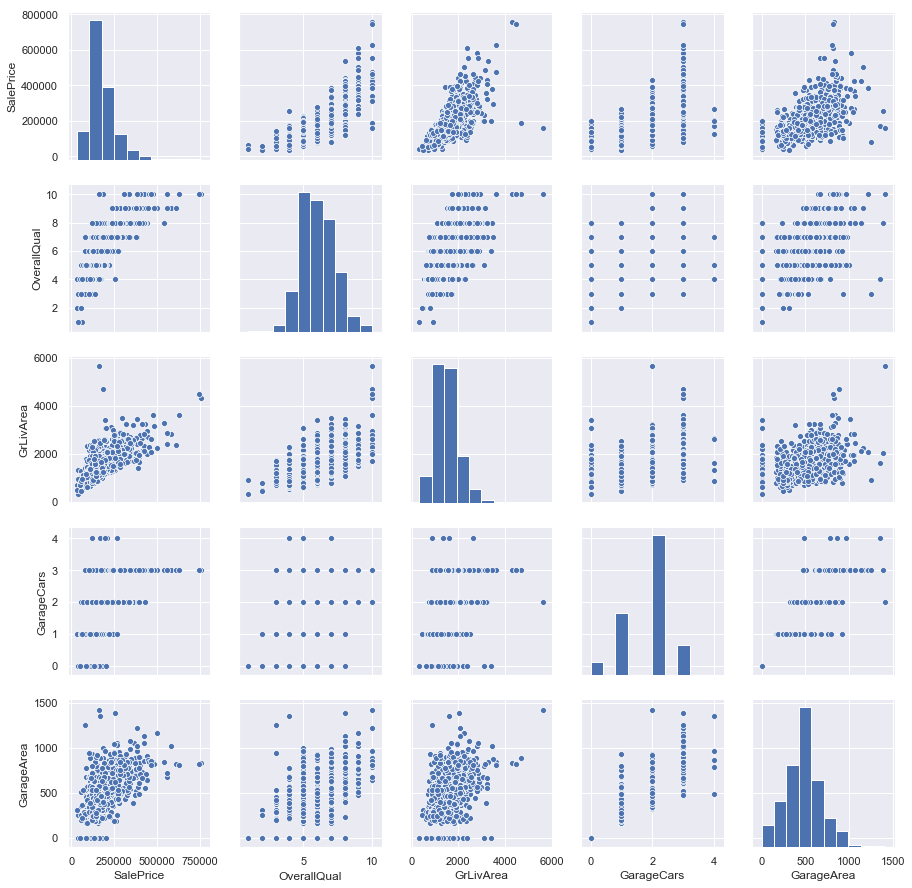

In [20]:
joint_plots(df_train,'SalePrice',5)